# Laboratorio 3 - Data Science
## Series de Tiempo usando LSTM
### Integrantes:

* Mario Guerra - Carné: 21008
* Javier Alvarado - Carné: 21188

## Creación de Series de Tiempo utilizadas en el anterior laboratorio.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa as tsa
import statsmodels as sm
from datetime import datetime
import os
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

#Tensorflow
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential,save_model,load_model
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.metrics import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
import keras
#

            Gas licuado de petróleo  Gasolina regular  Gasolina superior  \
Fecha                                                                      
2000-01-01            194410.476190         202645.20          308156.82   
2000-02-01            174710.552381         205530.96          307766.31   
2000-03-01            189234.066667         229499.56          331910.29   
2000-04-01            174330.607143         210680.40          315648.08   
2000-05-01            191745.147619         208164.34          319667.97   

            Diesel alto azufre  Diesel bajo azufre  Diesel ultra bajo azufre  
Fecha                                                                         
2000-01-01           634667.06                 0.0                       0.0  
2000-02-01           642380.66                 0.0                       0.0  
2000-03-01           699807.25                 0.0                       0.0  
2000-04-01           586803.98                 0.0                      

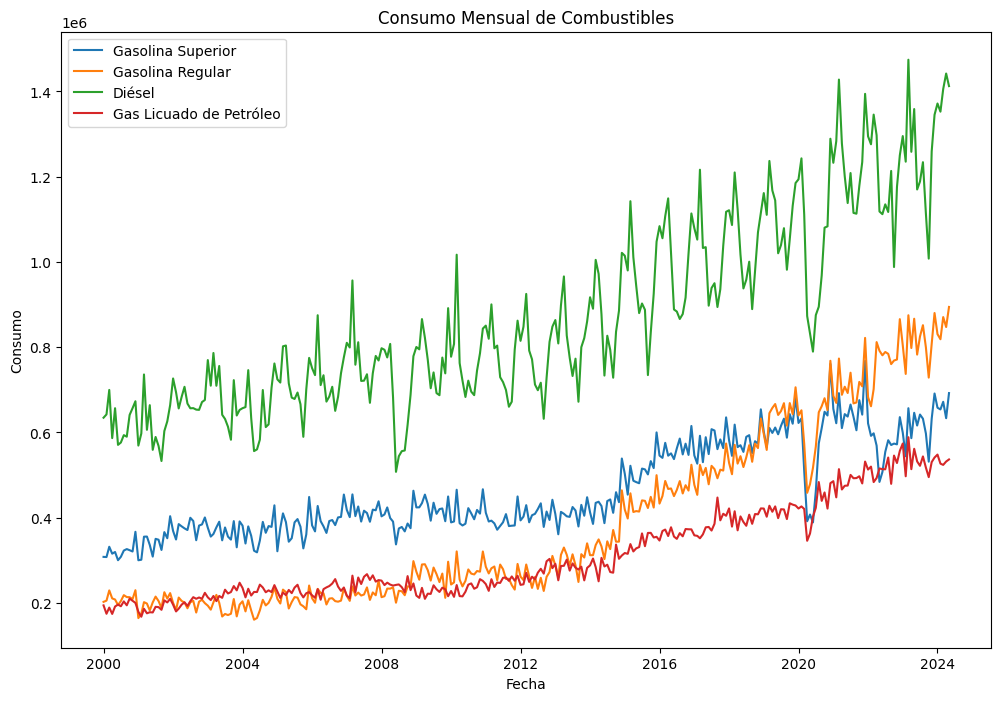

            Diesel bajo azufre  Diesel ultra bajo azufre  \
Fecha                                                      
2001-01-01                 0.0                       0.0   
2001-02-01                 0.0                       0.0   
2001-03-01                 0.0                       0.0   
2001-04-01                 0.0                       0.0   
2001-05-01                 0.0                       0.0   

            Gas licuado de petróleo  Gasolina regular  Gasolina superior  \
Fecha                                                                      
2001-01-01            194065.738095         177776.50          373963.96   
2001-02-01            170703.380952         123115.99          243091.07   
2001-03-01            161837.371429         161726.42          312084.38   
2001-04-01            163048.642857         127338.74          285054.89   
2001-05-01            171518.861905         168730.19          300913.67   

            Diesel alto azufre  
Fecha        

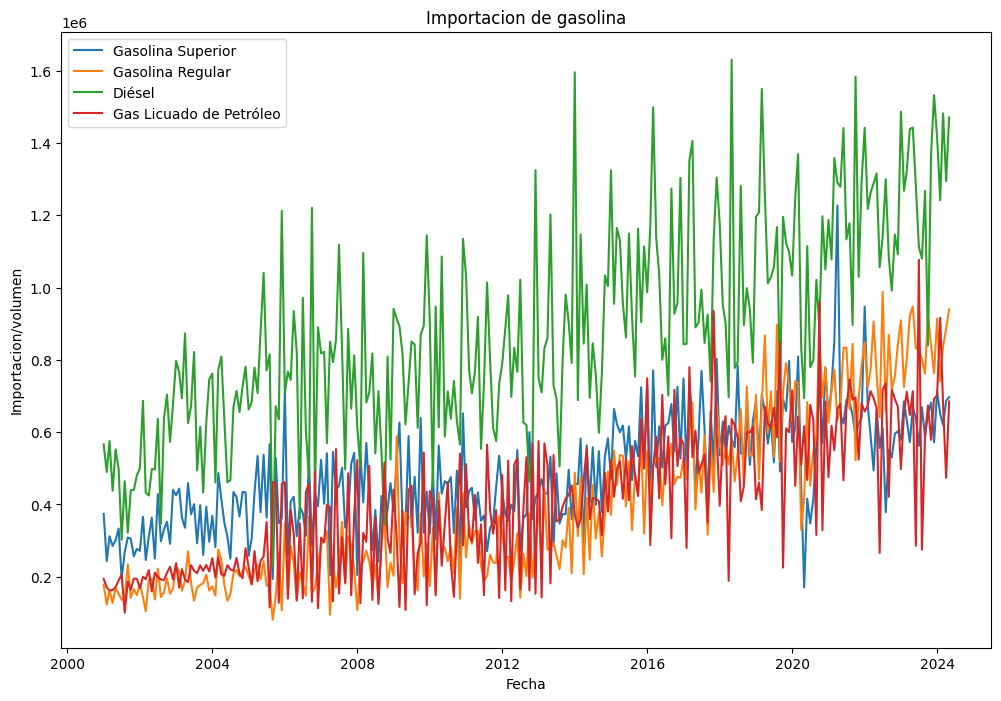

series_diesel: FECHA
2021-01-01    17.61
2021-01-02    17.61
2021-01-03    17.61
2021-01-04    17.61
2021-01-05    17.61
              ...  
2024-07-19    28.55
2024-07-20    28.55
2024-07-21    28.55
2024-07-22    28.09
2024-07-23    28.09
Name: Diesel, Length: 1300, dtype: float64
series_gas_licuado: FECHA
2021-01-01    26.928
2021-01-02    26.928
2021-01-03    26.928
2021-01-04    26.928
2021-01-05    26.928
               ...  
2024-07-19    29.920
2024-07-20    29.920
2024-07-21    29.920
2024-07-22    29.920
2024-07-23    29.920
Name: Glp Cilindro 25Lbs., Length: 1300, dtype: float64


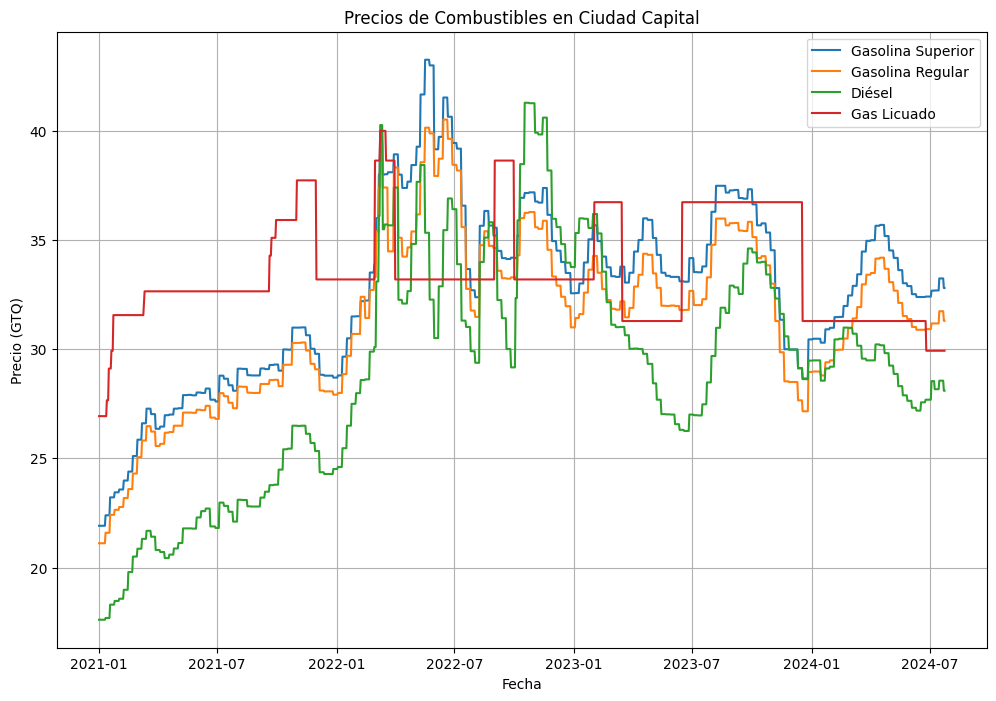

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Ruta al archivo .xlsx
file_path_1 = './consumo_gas.xlsx'

# Leer el archivo .xlsx en un DataFrame
df = pd.read_excel(file_path_1)

# Convertir la columna 'Fecha' a un índice de tipo fecha
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%b/%Y')
df.set_index('Fecha', inplace=True)

# Visualizar los datos
print(df.head())

# Crear una serie de tiempo para cada tipo de combustible
series_gasolina_super_consumo = df['Gasolina superior']
series_gasolina_regular_consumo = df['Gasolina regular']
series_diesel_consumo = df[['Diesel alto azufre', 'Diesel bajo azufre', 'Diesel ultra bajo azufre']].sum(axis=1)
series_gas_licuado_consumo = df['Gas licuado de petróleo']

# Graficar las series de tiempo
plt.figure(figsize=(12, 8))
plt.plot(series_gasolina_super_consumo, label='Gasolina Superior')
plt.plot(series_gasolina_regular_consumo, label='Gasolina Regular')
plt.plot(series_diesel_consumo, label='Diésel')
plt.plot(series_gas_licuado_consumo, label='Gas Licuado de Petróleo')
plt.legend()
plt.title('Consumo Mensual de Combustibles')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.show()

# Ruta al archivo .xlsx
file_path_2 = './importacion_gas.xlsx'

# Leer el archivo .xlsx en un DataFrame
df = pd.read_excel(file_path_2)

# Convertir la columna 'Fecha' a un índice de tipo fecha
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%b/%Y')
df.set_index('Fecha', inplace=True)

# Visualizar los datos
print(df.head())

# Crear una serie de tiempo para cada tipo de combustible
series_gasolina_super_importacion = df['Gasolina superior']
series_gasolina_regular_importacion = df['Gasolina regular']
series_diesel_importacion = df[['Diesel alto azufre', 'Diesel bajo azufre', 'Diesel ultra bajo azufre']].sum(axis=1)
series_gas_licuado_importacion = df['Gas licuado de petróleo']

# Graficar las series de tiempo
plt.figure(figsize=(12, 8))
plt.plot(series_gasolina_super_importacion, label='Gasolina Superior')
plt.plot(series_gasolina_regular_importacion, label='Gasolina Regular')
plt.plot(series_diesel_importacion, label='Diésel')
plt.plot(series_gas_licuado_importacion, label='Gas Licuado de Petróleo')
plt.legend()
plt.title('Importacion de gasolina')
plt.xlabel('Fecha')
plt.ylabel('Importacion/volumen')
plt.show()

# Ruta al archivo .xlsx
file_path_3 = './precios_gas.xlsx'

# Leer el archivo .xlsx en un DataFrame
df = pd.read_excel(file_path_3)

# Convertir la columna 'FECHA' a un índice de tipo fecha
df['FECHA'] = pd.to_datetime(df['FECHA'], format='%d/%b/%Y')
df.set_index('FECHA', inplace=True)

# Visualizar los primeros registros para verificar la carga
#print(df.head())

# Eliminar filas con fechas NaT
df = df.dropna()

# Convertir las columnas a valores numéricos
df['Superior'] = pd.to_numeric(df['Superior'], errors='coerce')
df['Regular'] = pd.to_numeric(df['Regular'], errors='coerce')
df['Diesel'] = pd.to_numeric(df['Diesel'], errors='coerce')

df['Glp Cilindro 25Lbs.'] = pd.to_numeric(df['Glp Cilindro 25Lbs.'], errors='coerce')

# Realizar la conversión de GLP de precio por cilindro a precio por galón
df['Glp Cilindro 25Lbs.'] = (df['Glp Cilindro 25Lbs.'] / 25) * 6.8

# Crear una serie de tiempo para cada tipo de combustible
series_gasolina_super_precios = df['Superior']
series_gasolina_regular_precios = df['Regular']
series_diesel_precios = df['Diesel']
series_gas_licuado_precios = df['Glp Cilindro 25Lbs.']

# Graficar las series de tiempo
plt.figure(figsize=(12, 8))
plt.plot(series_gasolina_super_precios, label='Gasolina Superior')
plt.plot(series_gasolina_regular_precios, label='Gasolina Regular')
plt.plot(series_diesel_precios, label='Diésel')
print(f"series_diesel: {series_diesel_precios}")
print(f"series_gas_licuado: {series_gas_licuado_precios}")
plt.plot(series_gas_licuado_precios, label='Gas Licuado')

plt.legend()
plt.title('Precios de Combustibles en Ciudad Capital')
plt.xlabel('Fecha')
plt.ylabel('Precio (GTQ)')
plt.grid(True)
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller

# Prueba de Dickey-Fuller para la serie diferenciada
result_super = adfuller(series_gasolina_super_consumo.dropna())
result_regular = adfuller(series_gasolina_regular_consumo.dropna())
result_diesel = adfuller(series_diesel_consumo.dropna())
result_gas_licuado = adfuller(series_gas_licuado_consumo.dropna())

print("\nConsumo\n")
print("ADF Statistic (Gasolina Superior):", result_super[0])
print("p-value (Gasolina Superior):", result_super[1])
print("ADF Statistic (Gasolina Regular):", result_regular[0])
print("p-value (Gasolina Regular):", result_regular[1])
print("ADF Statistic (Diesel):", result_diesel[0])
print("p-value (Diesel):", result_diesel[1])
print("ADF Statistic (Gas Licuado):", result_gas_licuado[0])
print("p-value (Gas Licuado):", result_gas_licuado[1])

# Prueba de Dickey-Fuller para la serie diferenciada
result_super_importacion = adfuller(series_gasolina_super_importacion.dropna())
result_regular_importacion = adfuller(series_gasolina_regular_importacion.dropna())
result_diesel_importacion = adfuller(series_diesel_importacion.dropna())
result_gas_licuado_importacion = adfuller(series_gas_licuado_importacion.dropna())

print("\nImportación\n")
print("ADF Statistic (Gasolina Superior):", result_super_importacion[0])
print("p-value (Gasolina Superior):", result_super_importacion[1])
print("ADF Statistic (Gasolina Regular):", result_regular_importacion[0])
print("p-value (Gasolina Regular):", result_regular_importacion[1])
print("ADF Statistic (Diesel):", result_diesel_importacion[0])
print("p-value (Diesel):", result_diesel_importacion[1])
print("ADF Statistic (Gas Licuado):", result_gas_licuado_importacion[0])
print("p-value (Gas Licuado):", result_gas_licuado_importacion[1])

# Prueba de Dickey-Fuller para la serie diferenciada
result_super_precios = adfuller(series_gasolina_super_precios.dropna())
result_regular_precios = adfuller(series_gasolina_regular_precios.dropna())
result_diesel_precios = adfuller(series_diesel_precios.dropna())
result_gas_licuado_precios = adfuller(series_gas_licuado_precios.dropna())

print("\nPrecios en Ciudad Capital\n")
print("ADF Statistic (Gasolina Superior):", result_super_precios[0])
print("p-value (Gasolina Superior):", result_super_precios[1])
print("ADF Statistic (Gasolina Regular):", result_regular_precios[0])
print("p-value (Gasolina Regular):", result_regular_precios[1])
print("ADF Statistic (Diesel):", result_diesel_precios[0])
print("p-value (Diesel):", result_diesel_precios[1])
print("ADF Statistic (Gas Licuado):", result_gas_licuado_precios[0])
print("p-value (Gas Licuado):", result_gas_licuado_precios[1])


Consumo

ADF Statistic (Gasolina Superior): -0.6787829834154703
p-value (Gasolina Superior): 0.8521689503946174
ADF Statistic (Gasolina Regular): 2.712413649239666
p-value (Gasolina Regular): 0.9990875733155129
ADF Statistic (Diesel): 0.18941178386381652
p-value (Diesel): 0.9716614411975102
ADF Statistic (Gas Licuado): 0.8662148782601523
p-value (Gas Licuado): 0.9926331955934964

Importación

ADF Statistic (Gasolina Superior): -2.9329528457978373
p-value (Gasolina Superior): 0.0416480372802758
ADF Statistic (Gasolina Regular): 0.8288289928204887
p-value (Gasolina Regular): 0.992087554110633
ADF Statistic (Diesel): -0.8143723795874941
p-value (Diesel): 0.81486379206643
ADF Statistic (Gas Licuado): -0.4023060241400697
p-value (Gas Licuado): 0.9097130413332861

Precios en Ciudad Capital

ADF Statistic (Gasolina Superior): -2.9342088364403294
p-value (Gasolina Superior): 0.04151214775420225
ADF Statistic (Gasolina Regular): -2.7107059823632778
p-value (Gasolina Regular): 0.072203918247314

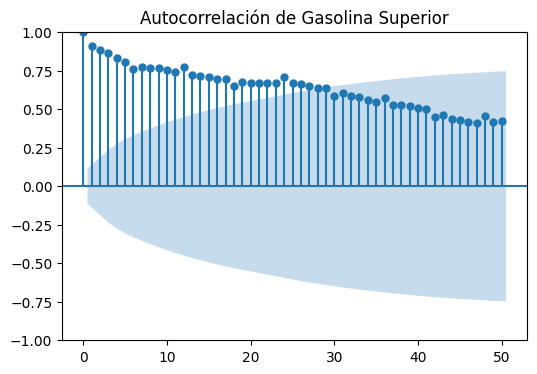

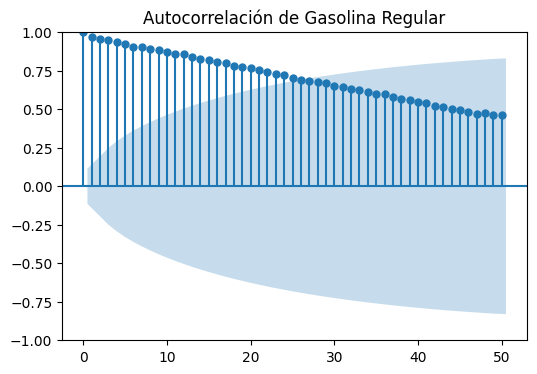

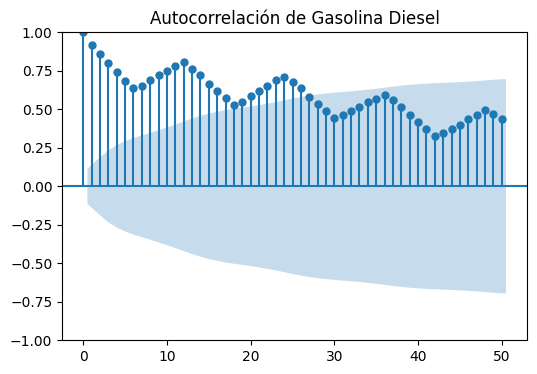

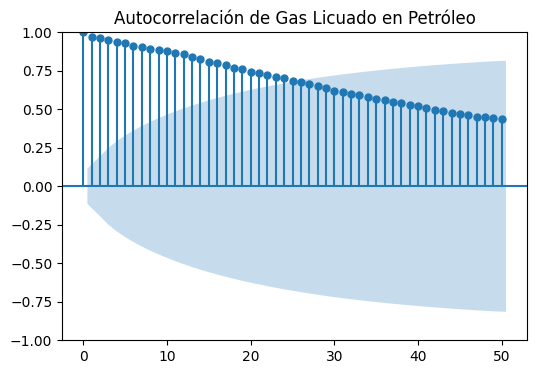

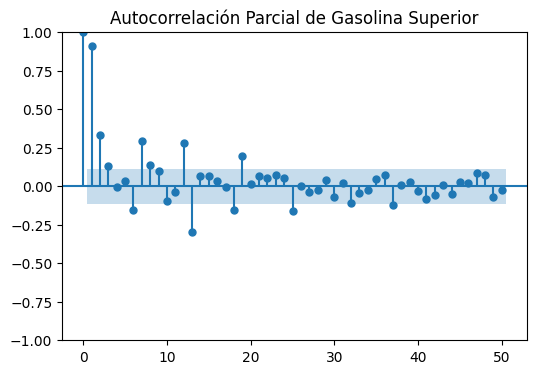

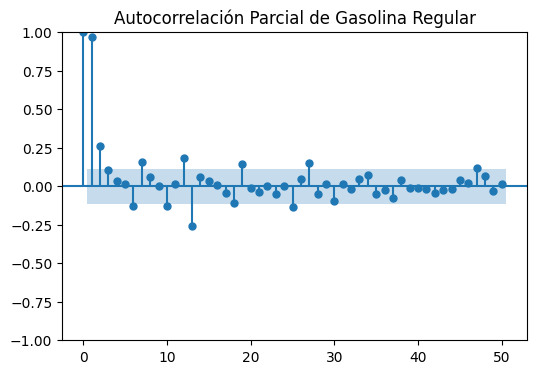

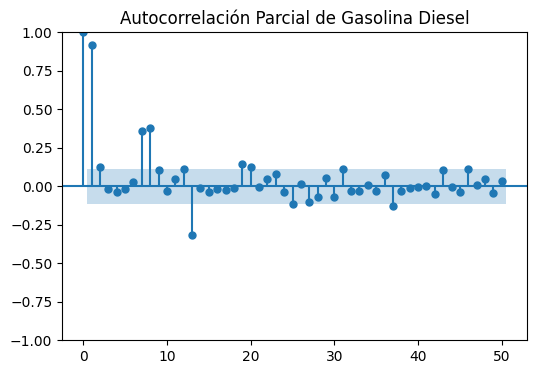

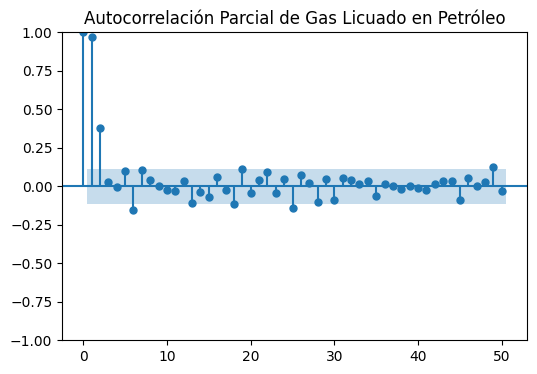

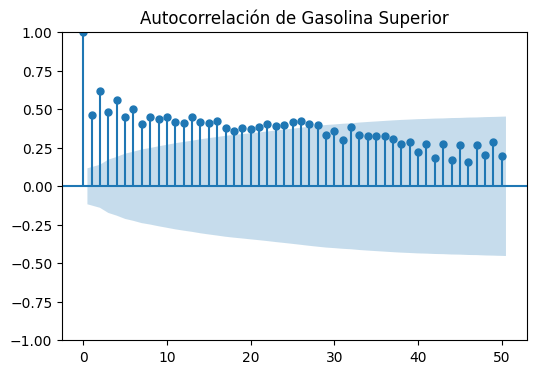

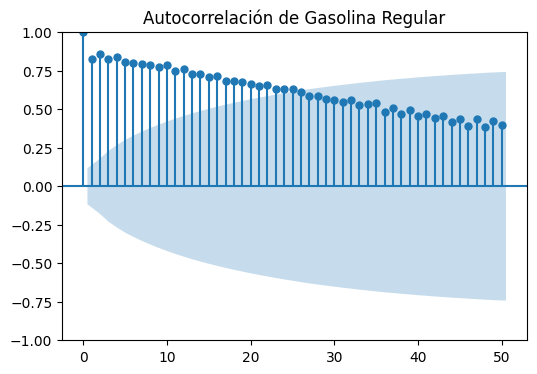

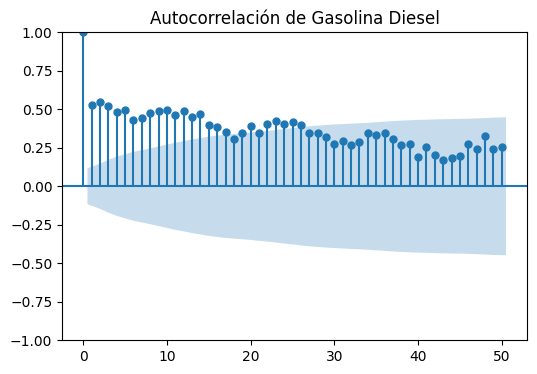

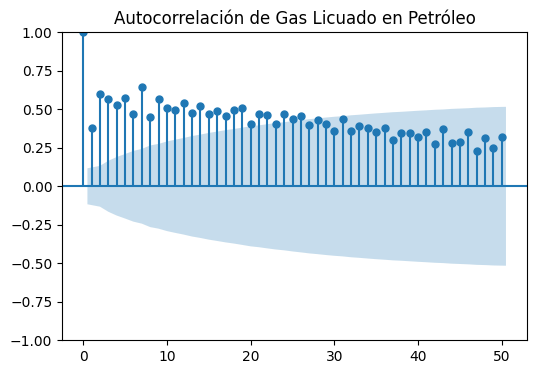

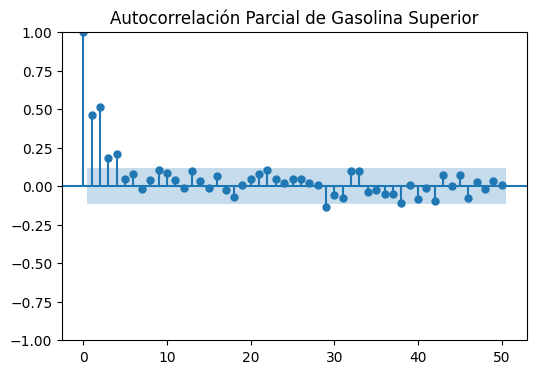

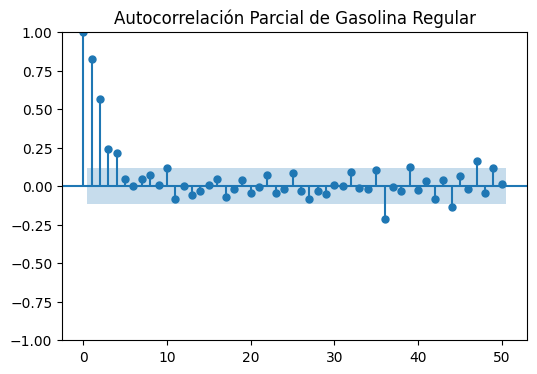

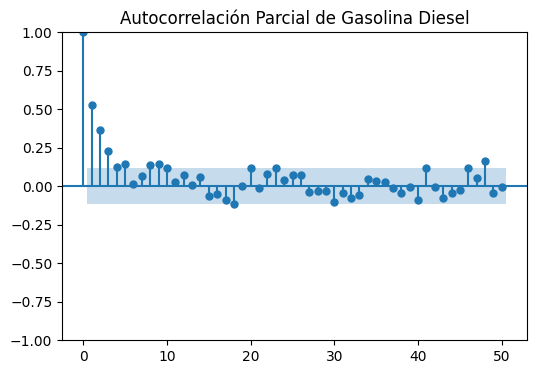

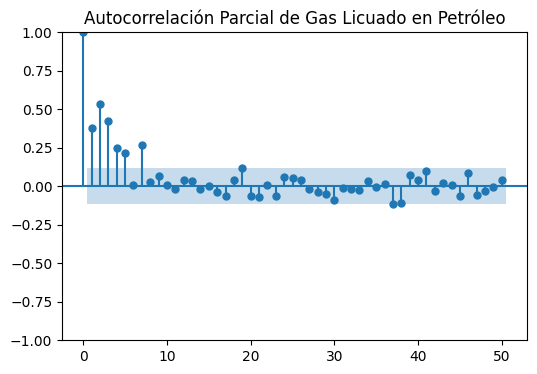

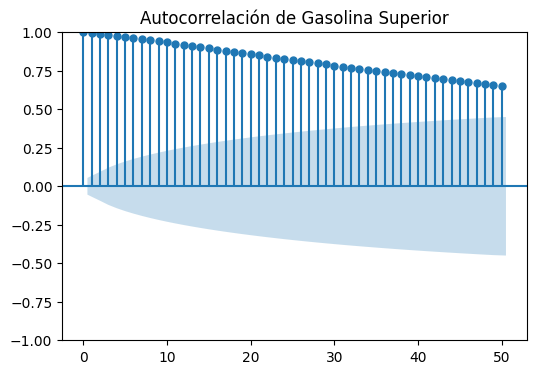

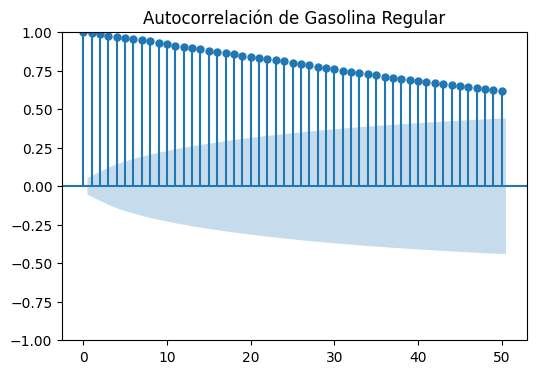

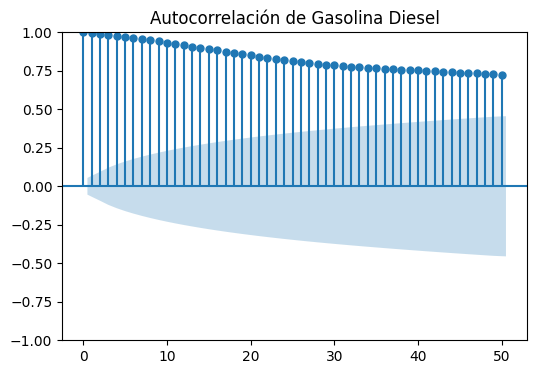

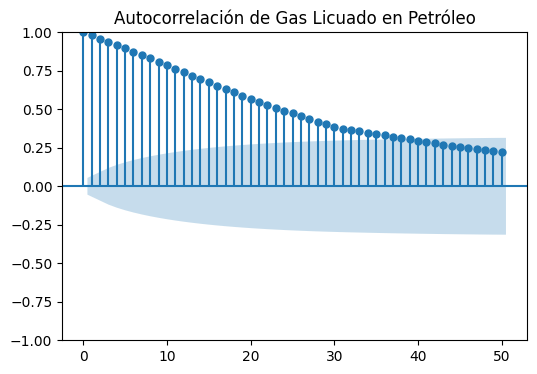

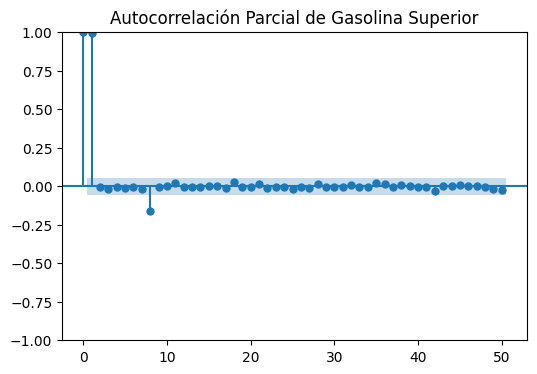

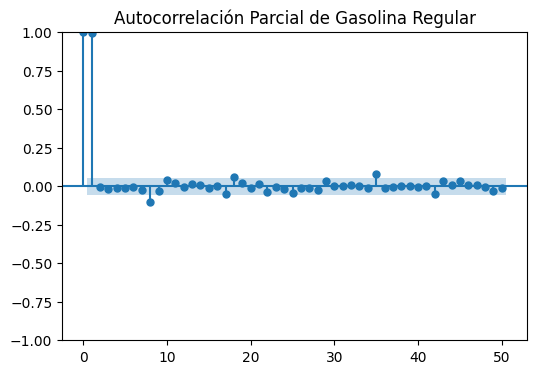

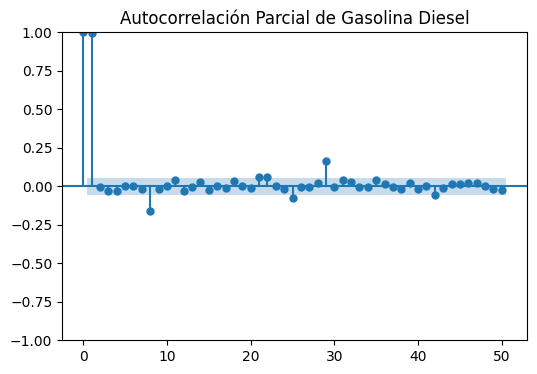

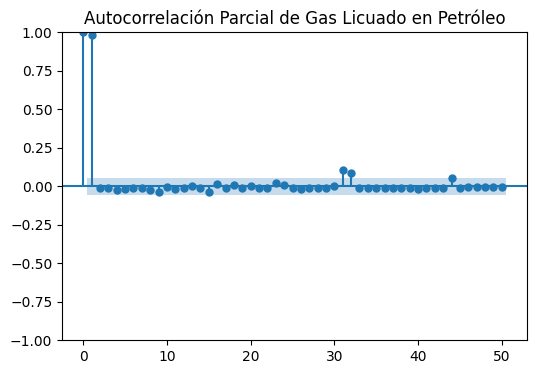

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graficar autocorrelación
plt.figure(figsize=(6, 4))
plot_acf(series_gasolina_super_consumo.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación de Gasolina Superior')
plt.show()

plt.figure(figsize=(6, 4))
plot_acf(series_gasolina_regular_consumo.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación de Gasolina Regular')
plt.show()

plt.figure(figsize=(6, 4))
plot_acf(series_diesel_consumo.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación de Gasolina Diesel')
plt.show()

plt.figure(figsize=(6, 4))
plot_acf(series_gas_licuado_consumo.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación de Gas Licuado en Petróleo')
plt.show()

# Graficar autocorrelación
plt.figure(figsize=(6, 4))
plot_pacf(series_gasolina_super_consumo.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gasolina Superior')
plt.show()

plt.figure(figsize=(6, 4))
plot_pacf(series_gasolina_regular_consumo.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gasolina Regular')
plt.show()

plt.figure(figsize=(6, 4))
plot_pacf(series_diesel_consumo.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gasolina Diesel')
plt.show()

plt.figure(figsize=(6, 4))
plot_pacf(series_gas_licuado_consumo.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gas Licuado en Petróleo')
plt.show()

# Graficar autocorrelación
plt.figure(figsize=(6, 4))
plot_acf(series_gasolina_super_importacion.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación de Gasolina Superior')
plt.show()

plt.figure(figsize=(6, 4))
plot_acf(series_gasolina_regular_importacion.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación de Gasolina Regular')
plt.show()

plt.figure(figsize=(6, 4))
plot_acf(series_diesel_importacion.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación de Gasolina Diesel')
plt.show()

plt.figure(figsize=(6, 4))
plot_acf(series_gas_licuado_importacion.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación de Gas Licuado en Petróleo')
plt.show()

# Graficar autocorrelación
plt.figure(figsize=(6, 4))
plot_pacf(series_gasolina_super_importacion.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gasolina Superior')
plt.show()

plt.figure(figsize=(6, 4))
plot_pacf(series_gasolina_regular_importacion.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gasolina Regular')
plt.show()

plt.figure(figsize=(6, 4))
plot_pacf(series_diesel_importacion.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gasolina Diesel')
plt.show()

plt.figure(figsize=(6, 4))
plot_pacf(series_gas_licuado_importacion.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gas Licuado en Petróleo')
plt.show()

# Graficar autocorrelación
plt.figure(figsize=(6, 4))
plot_acf(series_gasolina_super_precios.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación de Gasolina Superior')
plt.show()

plt.figure(figsize=(6, 4))
plot_acf(series_gasolina_regular_precios.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación de Gasolina Regular')
plt.show()

plt.figure(figsize=(6, 4))
plot_acf(series_diesel_precios.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación de Gasolina Diesel')
plt.show()

plt.figure(figsize=(6, 4))
plot_acf(series_gas_licuado_precios.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación de Gas Licuado en Petróleo')
plt.show()

# Graficar autocorrelación
plt.figure(figsize=(6, 4))
plot_pacf(series_gasolina_super_precios.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gasolina Superior')
plt.show()

plt.figure(figsize=(6, 4))
plot_pacf(series_gasolina_regular_precios.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gasolina Regular')
plt.show()

plt.figure(figsize=(6, 4))
plot_pacf(series_diesel_precios.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gasolina Diesel')
plt.show()

plt.figure(figsize=(6, 4))
plot_pacf(series_gas_licuado_precios.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelación Parcial de Gas Licuado en Petróleo')
plt.show()

In [22]:
series_super_diff_consumo = series_gasolina_super_consumo.diff().dropna()
series_regular_diff_consumo = series_gasolina_regular_consumo.diff().dropna()
series_diesel_diff_consumo = series_diesel_consumo.diff().dropna()
series_gas_licuado_diff_consumo = series_gas_licuado_consumo.diff().dropna()

# Prueba de Dickey-Fuller para la serie diferenciada
result_super_diff_consumo = adfuller(series_super_diff_consumo.dropna())
result_regular_diff_consumo = adfuller(series_regular_diff_consumo.dropna())
result_diesel_diff_consumo = adfuller(series_diesel_diff_consumo.dropna())
result_gas_licuado_diff_consumo = adfuller(series_gas_licuado_diff_consumo.dropna())

print("\nConsumo\n")
print("ADF Statistic (Gasolina Superior):", result_super_diff_consumo[0])
print("p-value (Gasolina Superior):", result_super_diff_consumo[1])
print("ADF Statistic (Gasolina Regular):", result_regular_diff_consumo[0])
print("p-value (Gasolina Regular):", result_regular_diff_consumo[1])
print("ADF Statistic (Diesel):", result_diesel_diff_consumo[0])
print("p-value (Diesel):", result_diesel_diff_consumo[1])
print("ADF Statistic (Gas Licuado):", result_gas_licuado_diff_consumo[0])
print("p-value (Gas Licuado):", result_gas_licuado_diff_consumo[1])

series_regular_diff_importacion = series_gasolina_regular_importacion.diff().dropna()
series_diesel_diff_importacion = series_diesel_importacion.diff().dropna()
series_gas_licuado_diff_importacion = series_gas_licuado_importacion.diff().dropna()

# Prueba de Dickey-Fuller para la serie diferenciada
result_regular_diff_importacion = adfuller(series_regular_diff_importacion.dropna())
result_diesel_diff_importacion = adfuller(series_diesel_diff_importacion.dropna())
result_gas_licuado_diff_importacion = adfuller(series_gas_licuado_diff_importacion.dropna())

print("\nImportación\n")
print("ADF Statistic (Gasolina Superior):", result_super_importacion[0])
print("p-value (Gasolina Superior):", result_super_importacion[1])
print("ADF Statistic (Gasolina Regular):", result_regular_diff_importacion[0])
print("p-value (Gasolina Regular):", result_regular_diff_importacion[1])
print("ADF Statistic (Diesel):", result_diesel_diff_importacion[0])
print("p-value (Diesel):", result_diesel_diff_importacion[1])
print("ADF Statistic (Gas Licuado):", result_gas_licuado_diff_importacion[0])
print("p-value (Gas Licuado):", result_gas_licuado_diff_importacion[1])

series_regular_diff_precios = series_gasolina_regular_precios.diff().dropna()
series_diesel_diff_precios = series_diesel_precios.diff().dropna()

# Prueba de Dickey-Fuller para la serie diferenciada
result_super_diff_precios = adfuller(series_gasolina_super_precios.dropna())
result_regular_diff_precios = adfuller(series_regular_diff_precios.dropna())
result_diesel_diff_precios = adfuller(series_diesel_diff_precios.dropna())
result_gas_licuado_diff_precios = adfuller(series_gas_licuado_precios.dropna())

print("\nPrecios en Ciudad Capital\n")
print("ADF Statistic (Gasolina Superior):", result_super_diff_precios[0])
print("p-value (Gasolina Superior):", result_super_diff_precios[1])
print("ADF Statistic (Gasolina Regular):", result_regular_diff_precios[0])
print("p-value (Gasolina Regular):", result_regular_diff_precios[1])
print("ADF Statistic (Diesel):", result_diesel_diff_precios[0])
print("p-value (Diesel):", result_diesel_diff_precios[1])
print("ADF Statistic (Gas Licuado):", result_gas_licuado_diff_precios[0])
print("p-value (Gas Licuado):", result_gas_licuado_diff_precios[1])


Consumo

ADF Statistic (Gasolina Superior): -4.646768005704357
p-value (Gasolina Superior): 0.00010582033641992787
ADF Statistic (Gasolina Regular): -4.273009782020565
p-value (Gasolina Regular): 0.0004945255464982825
ADF Statistic (Diesel): -7.112488126622303
p-value (Diesel): 3.906389979654226e-10
ADF Statistic (Gas Licuado): -9.303426174379599
p-value (Gas Licuado): 1.0968524817767392e-15

Importación

ADF Statistic (Gasolina Superior): -2.9329528457978373
p-value (Gasolina Superior): 0.0416480372802758
ADF Statistic (Gasolina Regular): -10.111097641346007
p-value (Gasolina Regular): 9.998584727414137e-18
ADF Statistic (Diesel): -8.951085512668518
p-value (Diesel): 8.720099018219089e-15
ADF Statistic (Gas Licuado): -8.476967328370938
p-value (Gas Licuado): 1.426759804991633e-13

Precios en Ciudad Capital

ADF Statistic (Gasolina Superior): -2.9342088364403294
p-value (Gasolina Superior): 0.04151214775420225
ADF Statistic (Gasolina Regular): -8.514719078688508
p-value (Gasolina Regu

## Implementación de conjuntos de entrenamiento y prueba

In [23]:
train_size = 0.60
val_size = 0.20

def datos(serieDeTiempo):
    n = len(serieDeTiempo)
    train_end = int(n * train_size)
    val_end = int(n * (train_size + val_size))

    train = serieDeTiempo[:train_end]
    val = serieDeTiempo[train_end:val_end]
    test = serieDeTiempo[val_end:]

    return train, val, test

def supervisada(serie, retrasos=1):
    serie_x = []
    serie_y = []
    for i in range(len(serie) - retrasos):
        valor = serie[i:(i + retrasos), 0]
        valor_sig = serie[i + retrasos, 0]
        serie_x.append(valor)
        serie_y.append(valor_sig)
    return np.array(serie_x), np.array(serie_y)

In [24]:
scaler = StandardScaler()

series_super_diff_consumo = pd.DataFrame(series_super_diff_consumo)
series_consumo_scaled = scaler.fit_transform(series_super_diff_consumo.values.reshape(-1, 1))
series_consumo_scaled = pd.DataFrame(series_consumo_scaled, index=series_super_diff_consumo.index, columns=series_super_diff_consumo.columns)

series_gasolina_super_importacion = pd.DataFrame(series_gasolina_super_importacion)
series_importacion_scaled = scaler.fit_transform(series_gasolina_super_importacion.values.reshape(-1, 1))
series_importacion_scaled = pd.DataFrame(series_importacion_scaled, index=series_gasolina_super_importacion.index, columns=series_gasolina_super_importacion.columns)

series_gasolina_super_precios = pd.DataFrame(series_gasolina_super_precios)
series_precios_scaled = scaler.fit_transform(series_gasolina_super_precios.values.reshape(-1, 1))
series_precios_scaled = pd.DataFrame(series_precios_scaled, index=series_gasolina_super_precios.index, columns=series_gasolina_super_precios.columns)

train_consumo, val_consumo, test_consumo = datos(series_consumo_scaled)

train_importacion, val_importacion, test_importacion = datos(series_importacion_scaled)

train_precios, val_precios, test_precios = datos(series_precios_scaled)

x_trainC,y_trainC = supervisada(train_consumo.values)
x_valC,y_valC = supervisada(val_consumo.values)
x_testC,y_testC = supervisada(test_consumo.values)

x_trainI,y_trainI = supervisada(train_importacion.values)
x_valI,y_valI = supervisada(val_importacion.values)
x_testI,y_testI = supervisada(test_importacion.values)

x_trainP,y_trainP = supervisada(train_precios.values)
x_valP,y_valP = supervisada(val_precios.values)
x_testP,y_testP = supervisada(test_precios.values)

In [25]:
x_trainC_3D = np.reshape(x_trainC, (x_trainC.shape[0], 1, 1))
x_valC_3D = np.reshape(x_valC, (x_valC.shape[0], 1, 1))
x_testC_3D = np.reshape(x_testC, (x_testC.shape[0], 1, 1))
x_trainI_3D = np.reshape(x_trainI, (x_trainI.shape[0], 1, 1))
x_valI_3D = np.reshape(x_valI, (x_valI.shape[0], 1, 1))
x_testI_3D = np.reshape(x_testI, (x_testI.shape[0], 1, 1))
x_trainP_3D = np.reshape(x_trainP, (x_trainP.shape[0], 1, 1))
x_valP_3D = np.reshape(x_valP, (x_valP.shape[0], 1, 1))
x_testP_3D = np.reshape(x_testP, (x_testP.shape[0], 1, 1))

## Creación de modelos LSTM con distintos parámetros para series de tiempo para gasolina super

In [26]:
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Input
from keras.models import Model

# Consumo

loteC1 = 1
unidadesC1 =  1
pasoC1 = 1
caracteristicasC1 = 1

inputsC1 = keras.layers.Input((pasoC1,caracteristicasC1))
lstm_outC1 = keras.layers.LSTM(loteC1)(inputsC1)
outputsC1 = keras.layers.Dense(1)(lstm_outC1)

modelo1Consumo = keras.Model(inputs=inputsC1, outputs=outputsC1)
modelo1Consumo.summary()


loteC2 = 2
unidadesC2 =  5
pasoC2 = 1
caracteristicasC2 = 1

inputsC2 = keras.layers.Input((pasoC2,caracteristicasC2))
lstm_outC2 = keras.layers.LSTM(loteC2)(inputsC2)
outputsC2 = keras.layers.Dense(1)(lstm_outC2)

modelo2Consumo = keras.Model(inputs=inputsC2, outputs=outputsC2)
modelo2Consumo.summary()

# Importación

loteI1 = 1
unidadesI1 =  1
pasoI1 = 1
caracteristicasI1 = 1

inputsI1 = keras.layers.Input((pasoI1,caracteristicasI1))
lstm_outI1 = keras.layers.LSTM(loteI1)(inputsI1)
outputsI1 = keras.layers.Dense(1)(lstm_outI1)

modelo1Importacion = keras.Model(inputs=inputsI1, outputs=outputsI1)
modelo1Importacion.summary()

loteI2 = 2
unidadesI2 =  5
pasoI2 = 1
caracteristicasI2 = 1

inputsI2 = keras.layers.Input((pasoI2,caracteristicasI2))
lstm_outI2 = keras.layers.LSTM(loteI2)(inputsI2)
outputsI2 = keras.layers.Dense(1)(lstm_outI2)

modelo2Importacion = keras.Model(inputs=inputsI2, outputs=outputsI2)
modelo2Importacion.summary()

# Precios

loteP1 = 1
unidadesP1 =  1
pasoP1 = 1
caracteristicasP1 = 1

inputsP1 = keras.layers.Input((pasoP1,caracteristicasP1))
lstm_outP1 = keras.layers.LSTM(loteP1)(inputsP1)
outputsP1 = keras.layers.Dense(1)(lstm_outP1)

modelo1Precios = keras.Model(inputs=inputsP1, outputs=outputsP1)
modelo1Precios.summary()

loteP2 = 2
unidadesP2 =  5
pasoP2 = 1
caracteristicasP2 = 1

inputsP2 = keras.layers.Input((pasoP2,caracteristicasP2))
lstm_outP2 = keras.layers.LSTM(loteP2)(inputsP2)
outputsP2 = keras.layers.Dense(1)(lstm_outP2)

modelo2Precios = keras.Model(inputs=inputsP2, outputs=outputsP2)
modelo2Precios.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 1, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 1)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14 (56.00 B)

 Trainable params: 14 (56.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 1, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 2)                   │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35 (140.00 B)

 Trainable params: 35 (140.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 1, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 1)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14 (56.00 B)

 Trainable params: 14 (56.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 1, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 2)                   │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35 (140.00 B)

 Trainable params: 35 (140.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 1, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 1)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14 (56.00 B)

 Trainable params: 14 (56.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 1, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 2)                   │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35 (140.00 B)

 Trainable params: 35 (140.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Compilación de modelos

modelo1Consumo.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.1), metrics = [RootMeanSquaredError()])
modelo2Consumo.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.1), metrics = [RootMeanSquaredError()])
modelo1Importacion.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.1), metrics = [RootMeanSquaredError()])
modelo2Importacion.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.1), metrics = [RootMeanSquaredError()])
modelo1Precios.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.1), metrics = [RootMeanSquaredError()])
modelo2Precios.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.1), metrics = [RootMeanSquaredError()])

In [28]:
# Entrenamiento

epocas = 150
historyC1= modelo1Consumo.fit(
    x = x_trainC_3D,
    y = y_trainC,
    batch_size = loteC1,
    epochs = epocas,
    shuffle = False,
    validation_data = (x_valC_3D, y_valC),
    #callbacks=[early_stop],
    verbose=1
)

historyC2= modelo2Consumo.fit(
    x = x_trainC_3D,
    y = y_trainC,
    batch_size = loteC2,
    epochs = epocas,
    shuffle = False,
    validation_data = (x_valC_3D, y_valC),
    #callbacks=[early_stop],
    verbose=1
)

historyI1= modelo1Importacion.fit(
    x = x_trainI_3D,
    y = y_trainI,
    batch_size = loteI1,
    epochs = epocas,
    shuffle = False,
    validation_data = (x_valI_3D, y_valI),
    #callbacks=[early_stop],
    verbose=1
)

historyI2= modelo2Importacion.fit(
    x = x_trainI_3D,
    y = y_trainI,
    batch_size = loteI2,
    epochs = epocas,
    shuffle = False,
    validation_data = (x_valI_3D, y_valI),
    #callbacks=[early_stop],
    verbose=1
)

historyP1= modelo1Precios.fit(
    x = x_trainP_3D,
    y = y_trainP,
    batch_size = loteP1,
    epochs = epocas,
    shuffle = False,
    validation_data = (x_valP_3D, y_valP),
    #callbacks=[early_stop],
    verbose=1
)

historyP2= modelo2Precios.fit(
    x = x_trainP_3D,
    y = y_trainP,
    batch_size = loteP2,
    epochs = epocas,
    shuffle = False,
    validation_data = (x_valP_3D, y_valP),
    #callbacks=[early_stop],
    verbose=1
)

Epoch 1/150
174/174 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.5631 - root_mean_squared_error: 0.7448 - val_loss: 0.7416 - val_root_mean_squared_error: 0.8611
Epoch 2/150
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5032 - root_mean_squared_error: 0.7012 - val_loss: 0.7330 - val_root_mean_squared_error: 0.8562
Epoch 3/150
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4949 - root_mean_squared_error: 0.6948 - val_loss: 0.7154 - val_root_mean_squared_error: 0.8458
Epoch 4/150
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4903 - root_mean_squared_error: 0.6917 - val_loss: 0.7020 - val_root_mean_squared_error: 0.8379
Epoch 5/150
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4878 - root_mean_squared_error: 0.6900 - val_loss: 0.6940 - val_root_mean_squared_error: 0.8330
Epoch 6/150
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4863 - root_mean_squared_error: 0.6889 - val_loss: 0.6875 - val_root_mean_squared_error: 0.8292
Epoch 7/150
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3m

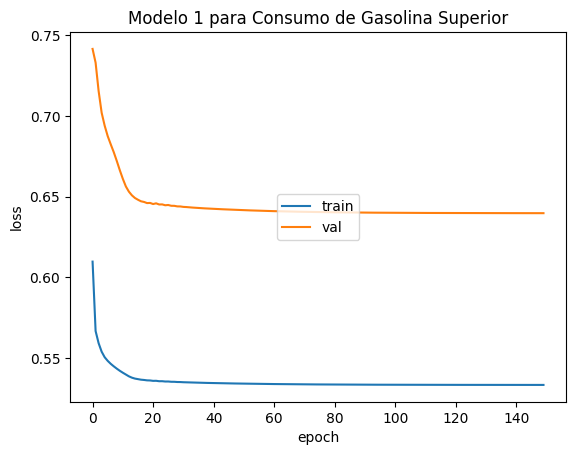

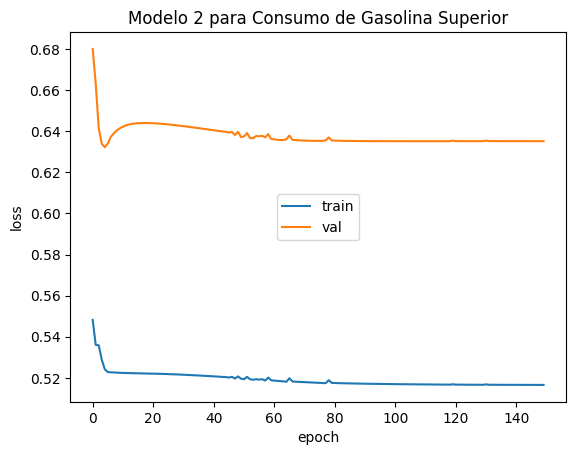

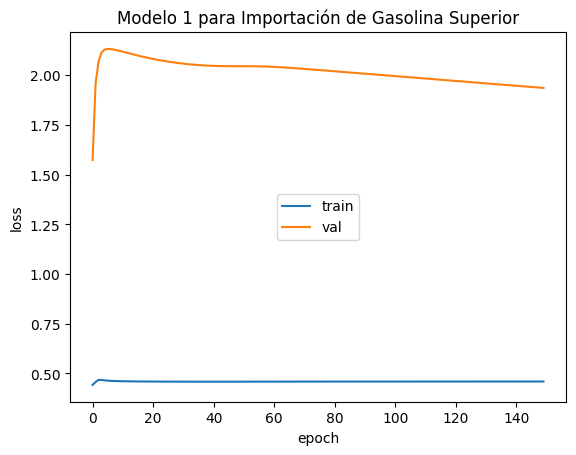

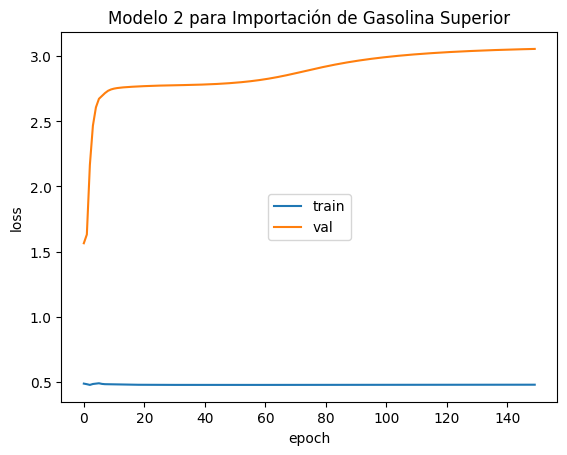

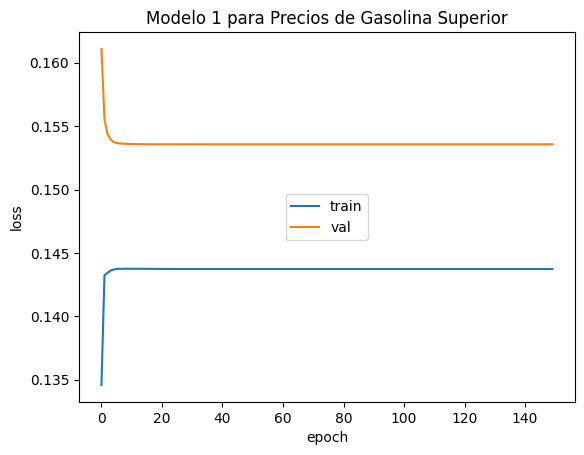

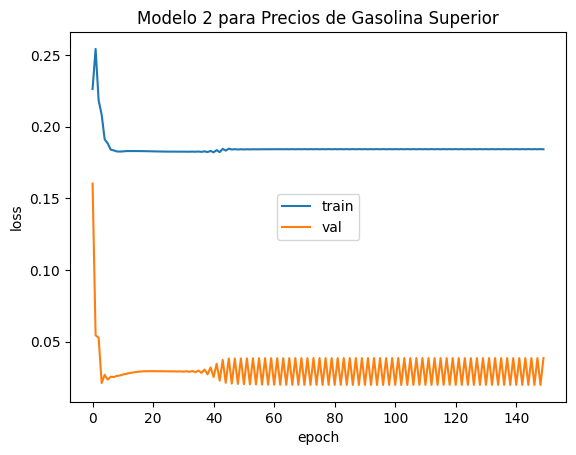

In [29]:
# Gráficos para pérdida en entrenamiento y validación.

plt.plot(historyC1.history['loss'])
plt.plot(historyC1.history['val_loss'])
plt.title('Modelo 1 para Consumo de Gasolina Superior')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='center')
plt.show()

plt.plot(historyC2.history['loss'])
plt.plot(historyC2.history['val_loss'])
plt.title('Modelo 2 para Consumo de Gasolina Superior')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='center')
plt.show()

plt.plot(historyI1.history['loss'])
plt.plot(historyI1.history['val_loss'])
plt.title('Modelo 1 para Importación de Gasolina Superior')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='center')
plt.show()

plt.plot(historyI2.history['loss'])
plt.plot(historyI2.history['val_loss'])
plt.title('Modelo 2 para Importación de Gasolina Superior')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='center')
plt.show()

plt.plot(historyP1.history['loss'])
plt.plot(historyP1.history['val_loss'])
plt.title('Modelo 1 para Precios de Gasolina Superior')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='center')
plt.show()

plt.plot(historyP2.history['loss'])
plt.plot(historyP2.history['val_loss'])
plt.title('Modelo 2 para Precios de Gasolina Superior')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='center')
plt.show()

In [30]:
print("Modelo de Consumo 1\n")
print("Pérdida en Entrenamiento")
modelo1Consumo.evaluate(
    x = x_trainC_3D,
    y = y_trainC
)
print("Pérdida en Validación")
modelo1Consumo.evaluate(
    x = x_valC_3D,
    y = y_valC
)
print("Pérdida en Prueba")
modelo1Consumo.evaluate(
    x = x_testC_3D,
    y = y_testC
)
print("Modelo de Consumo 2\n")

print("Pérdida en Entrenamiento")
modelo2Consumo.evaluate(
    x = x_trainC_3D,
    y = y_trainC
)
print("Pérdida en Validación")
modelo2Consumo.evaluate(
    x = x_valC_3D,
    y = y_valC
)
print("Pérdida en Prueba")
modelo2Consumo.evaluate(
    x = x_testC_3D,
    y = y_testC
)
print("Modelo de Importación 1\n")

print("Pérdida en Entrenamiento")
modelo1Importacion.evaluate(
    x = x_trainI_3D,
    y = y_trainI
)
print("Pérdida en Validación")
modelo1Importacion.evaluate(
    x = x_valI_3D,
    y = y_valI
)
print("Pérdida en Prueba")
modelo1Importacion.evaluate(
    x = x_testI_3D,
    y = y_testI
)
print("Modelo de Importación 2\n")

print("Pérdida en Entrenamiento")
modelo2Importacion.evaluate(
    x = x_trainI_3D,
    y = y_trainI
)
print("Pérdida en Validación")
modelo2Importacion.evaluate(
    x = x_valI_3D,
    y = y_valI
)
print("Pérdida en Prueba")
modelo2Importacion.evaluate(
    x = x_testI_3D,
    y = y_testI
)
print("Modelo de Precios 1\n")

print("Pérdida en Entrenamiento")
modelo1Precios.evaluate(
    x = x_trainP_3D,
    y = y_trainP
)
print("Pérdida en Validación")
modelo1Precios.evaluate(
    x = x_valP_3D,
    y = y_valP
)
print("Pérdida en Prueba")
modelo1Precios.evaluate(
    x = x_testP_3D,
    y = y_testP
)
print("Modelo de Precios 2\n")

print("Pérdida en Entrenamiento")
modelo2Precios.evaluate(
    x = x_trainP_3D,
    y = y_trainP
)
print("Pérdida en Validación")
modelo2Precios.evaluate(
    x = x_valP_3D,
    y = y_valP
)
print("Pérdida en Prueba")
modelo2Precios.evaluate(
    x = x_testP_3D,
    y = y_testP
)

Modelo de Consumo 1

Pérdida en Entrenamiento
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4948 - root_mean_squared_error: 0.7024  
Pérdida en Validación
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6367 - root_mean_squared_error: 0.7979 
Pérdida en Prueba
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.0375 - root_mean_squared_error: 1.4261
Modelo de Consumo 2

Pérdida en Entrenamiento
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4908 - root_mean_squared_error: 0.6996 
Pérdida en Validación
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6335 - root_mean_squared_error: 0.7959 
Pérdida en Prueba
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0396 - root_mean_squared_error: 1.4269 
Modelo de Importación 1

Pérdida en Entrenamiento
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7158 - root_mean_squared_error: 0.8419  
Pérdida en Validación
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.9200 - root_mean_squared_error: 1.3856 
Pérdida en Prueba
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - l

[0.2001824975013733, 0.44741758704185486]

Se realizó un promedio entre las pérdidas de entrenamiento, validación y pruebas para determinar en cuanto a consumo, importación y precios, cuál era el mejor para predecir.

Consumo:

- Modelo 1: 1.0563
- Modelo 2: 1.0546 (menor)

Importación:

- Modelo 1: 2.1579 (menor)
- Modelo 2: 3.1060

Precios:

- Modelo 1: 1.3685
- Modelo 2: 0.9002 (menor)

In [34]:
# Usar el mejor modelo para consumo (Modelo de Consumo 2) para predecir
predicciones_consumo = modelo2Consumo.predict(x_testC_3D)

# Usar el mejor modelo para importación (Modelo de Importación 1) para predecir
predicciones_importacion = modelo1Importacion.predict(x_testI_3D)

# Usar el mejor modelo para precios (Modelo de Precios 2) para predecir
predicciones_precios = modelo2Precios.predict(x_testP_3D)

# Mostrar las predicciones
print("Predicciones para Consumo:")
print(predicciones_consumo)

print("Predicciones para Importación:")
print(predicciones_importacion)

print("Predicciones para Precios:")
print(predicciones_precios)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Predicciones para Consumo:
[[-0.01399091]
 [ 0.03676561]
 [ 0.38768175]
 [-0.8040019 ]
 [ 0.3538647 ]
 [-0.9271349 ]
 [ 0.39571494]
 [ 0.12650901]
 [ 0.40106902]
 [ 0.40105635]
 [ 0.05519232]
 [ 0.34224337]
 [-1.0839067 ]
 [-1.2730519 ]
 [-0.36356655]
 [-0.4135823 ]
 [ 0.30034435]
 [-1.2837054 ]
 [ 0.400907  ]
 [ 0.37621173]
 [-1.0507777 ]
 [ 0.39971465]
 [-0.28525677]
 [ 0.28284496]
 [-0.18039009]
 [ 0.36774412]
 [ 0.37283507]
 [-1.0512062 ]
 [ 0.37635976]
 [-1.2880261 ]
 [ 0.40107054]
 [ 0.36914676]
 [ 0.18453313]
 [ 0.3681024 ]
 [ 0.39999408]
 [-0.07900405]
 [-0.6314521 ]
 [-0.16319045]
 [ 0.31305417]
 [ 0.21135125]
 [ 0.2552507 ]
 [-0.95760953]
 [ 0.37971127]
 [ 0.39395332]
 [-1.2742424 ]
 [ 0.39818338]
 [-0.8872721 ]
 [ 0.3700829 ]
 [-0.13053188]
 [ 0.30584985]
 [ 0.37740743]
 [ 0.39733788]
 [-1.2490966 ]
 [-0.88065493]
 [ 0.37549976]
 [ 0.27151722]
 [ 0.01875702]
 [ 0

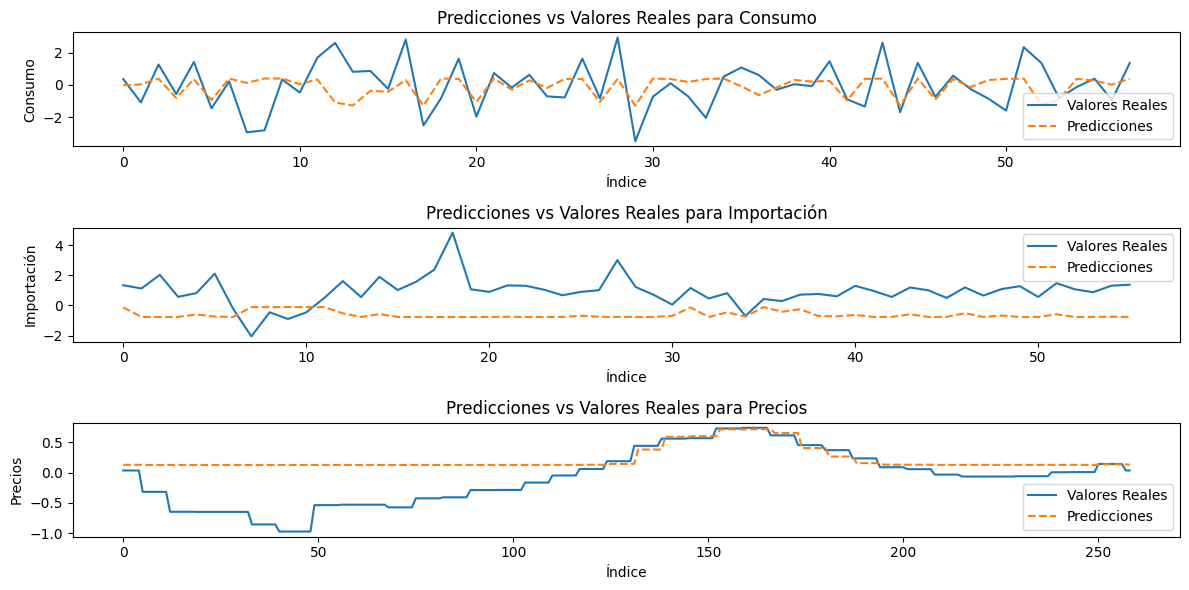

In [36]:
import matplotlib.pyplot as plt

# Visualizar predicciones vs valores reales para Consumo
plt.figure(figsize=(12, 6))

# Consumo
plt.subplot(3, 1, 1)
plt.plot(y_testC, label='Valores Reales')
plt.plot(predicciones_consumo, label='Predicciones', linestyle='--')
plt.title('Predicciones vs Valores Reales para Consumo')
plt.xlabel('Índice')
plt.ylabel('Consumo')
plt.legend()

# Importación
plt.subplot(3, 1, 2)
plt.plot(y_testI, label='Valores Reales')
plt.plot(predicciones_importacion, label='Predicciones', linestyle='--')
plt.title('Predicciones vs Valores Reales para Importación')
plt.xlabel('Índice')
plt.ylabel('Importación')
plt.legend()

# Precios
plt.subplot(3, 1, 3)
plt.plot(y_testP, label='Valores Reales')
plt.plot(predicciones_precios, label='Predicciones', linestyle='--')
plt.title('Predicciones vs Valores Reales para Precios')
plt.xlabel('Índice')
plt.ylabel('Precios')
plt.legend()

plt.tight_layout()
plt.show()